## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [3]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [5]:
# Put the command (or commands) here to answer the questions above.
#TODO
print('Cars prices: min={:0.2f}, max={:0.2f}'.format(cars.Price.min(), cars.Price.max()))
print('Cars mileage: min={:0.0f}, max={:0.0f}, average={:0.0f}'.format(cars.Mileage.min(), cars.Mileage.max(), cars.Mileage.mean()))

Cars prices: min=8638.93, max=70755.47
Cars mileage: min=266, max=50387, average=19832


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

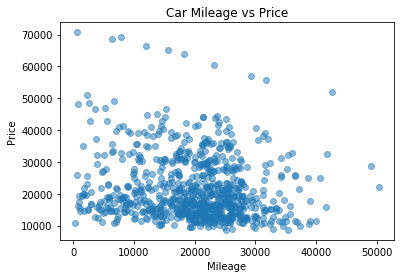

In [6]:
# Put the command (or commands) here that would give answer to the above question.


import matplotlib.pyplot as plt
%matplotlib inline
x=cars.Mileage
y=cars.Price

plt.scatter(x, y, alpha=0.5)
plt.title('Car Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


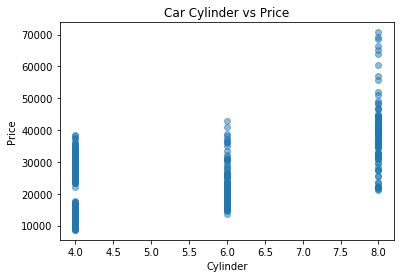

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
x=cars.Cylinder
y=cars.Price

plt.scatter(x, y, alpha=0.5)
plt.title('Car Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()


<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [8]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats 

from sklearn.model_selection import train_test_split
X=cars.Mileage
y=cars.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

print(X_train.shape), print(y_train.shape)

(538, 1)
(538, 1)


(None, None)

In [9]:
# Linear regression model:

regr = LinearRegression()
regr.fit(X_train, y_train)

# Show summary statistics for the model:
print('intercept: {}, coeficient: {}'.format(regr.intercept_, regr.coef_))

intercept: [25022.2790804], coeficient: [[-0.19545265]]


In [10]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as smapi
import statsmodels.api as sm

import scipy, scipy.stats 

# X_train = sm.add_constant(X_train)

print(X_train.shape), print(y_train.shape)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()


(538, 1)
(538, 1)


/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     14.90
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           0.000127
Time:                        22:17:46   Log-Likelihood:                -5690.9
No. Observations:                 538   AIC:                         1.139e+04
Df Residuals:                     536   BIC:                         1.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.502e+04   1098.876     22.771      0.000    2.29e+04    2.72e+04
x1            -0.1955      0.051     -3.861      0.000      -0.295      -0.096
==============================================================================
Omnibus:                      175.018   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.573
Skew:                           1.598   Prob(JB):                    4.90e-107
Kurtosis:                       6.409   Cond. No.                     5.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [ ]:
# Command:

# One sentence summary:
# It goes down 19.54 cents

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [ ]:
# Single command


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

In [ ]:
# Plot residuals

# Explain whether there are any problems (1-2 sentence)
#

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [ ]:
# Commands:

# Explanation:
# 

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [ ]:
# Command(s):

# Comment on the result


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [15]:
#chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
# Commands
# predict price $19589.6

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [ ]:
# Commands

# Comments on problems


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# enter your response here